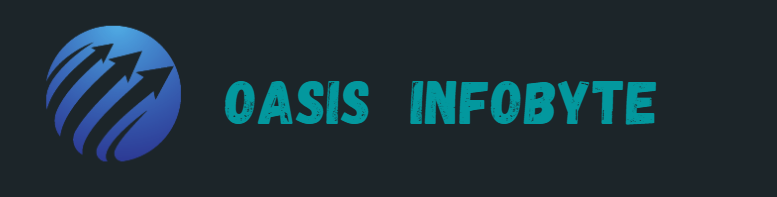

# #Task4-  EMAIL SPAM PREDICTION USING MACHINE LEARNING

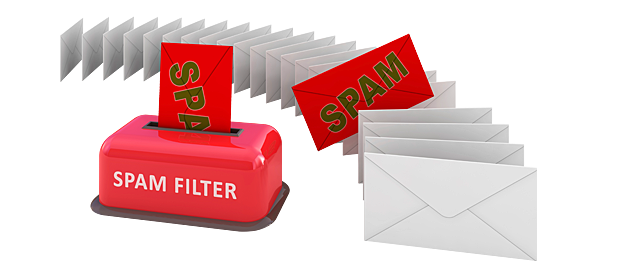

#### Spam filtering is a beginner’s example of document classification task which involves classifying an email as spam or non-spam (a.k.a. ham) mail. Spam box in your Gmail account is the best example of this. So lets get started in building a spam filter......

Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

Dataset- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### Importing Libaries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading DataFrame

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Droping Unnamed Columns

In [3]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

## Reassigning column Name

In [4]:
df.columns=['label','message']

### Dataframe Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


- dataframe of size 5572 rows and 2 column

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Checking for NaN and Duplicated Values

In [7]:
df.isna().sum()

label      0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace = True)

df.shape

(5169, 2)

## #Target Column

### Label

In [10]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

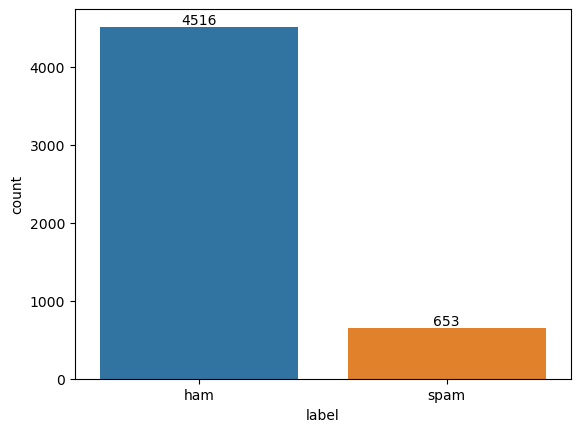

In [11]:
ax=sns.countplot(data=df,x='label')
for i in ax.containers:
    ax.bar_label(i)

### Pie Chart

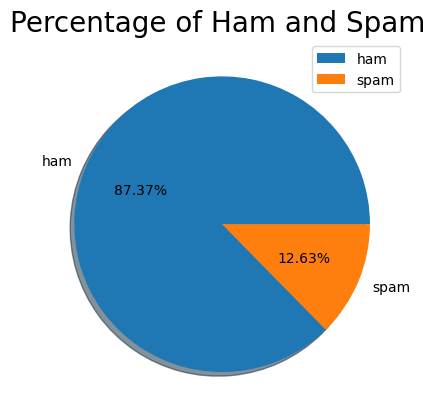

In [12]:
plt.pie(df.label.value_counts(),autopct="%1.2f%%",shadow=True,labels=df.label.unique());
plt.title('Percentage of Ham and Spam ',size=20)
plt.legend()
plt.show()

### Message Column

In [13]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

## Spam word image

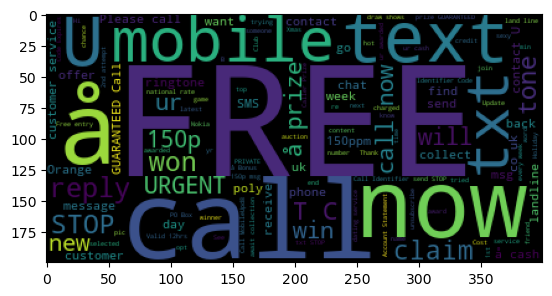

In [14]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="spam"]['message'])))
plt.imshow(wc)
plt.show()

## Ham word image

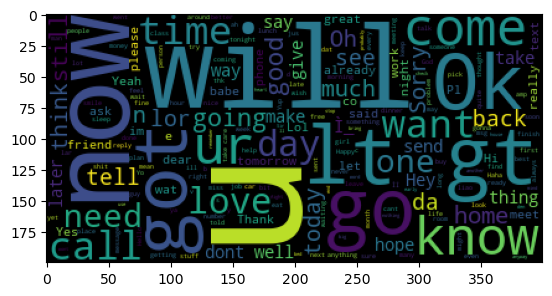

In [15]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['label']=="ham"]['message'])))
plt.imshow(wc)
plt.show()

# Text Processing

##  #Checking free Space in message column

In [16]:
str_null=[]
for indx,lbl,msg in df.itertuples():
    if type(msg)==str:
        if msg.isspace():
            str_null.append(indx)

In [17]:
str_null

[]

# Pipeline of natural language processing

### Step 1: Sentence segmentation
  ### -->1a: Case Coversion(Lower or Upper Case)
### Step 2: Word tokenization
  ### --> 2a:Punctuation Removal
### Step 3: Stemming/ Lemmatization
 ### Step 4: Stop word analysis

In [18]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Function is Created for NLP pipeline

In [19]:
def clean_sent(text):
    #tokenization and case conversion
    token=word_tokenize(text.lower())
    #token--->list of tokens
    #removing non alpha char
    ftoken=[i for i in token if i.isalpha()]
    #ftoken-----> list
    sw=stopwords.words("english")
    stokens=[i for i in ftoken if i not in sw]
    #stokens--->list
    #lemmatization
    lemma=WordNetLemmatizer()
    ltoken=[lemma.lemmatize(i) for i in stokens]
    #ltoken--->list
    #joining all tokens
    return " ".join(ltoken)

## Applying clean_sent Function

In [20]:
df["message"]=df["message"].astype(str)

df["message_new"]=df["message"].apply(clean_sent)

In [21]:
df.head()

,label,message,message_new
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


## Spliting DataFrame

In [22]:
x=df["message_new"]
x

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message_new, Length: 5169, dtype: object

In [23]:
y=df["label"]
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5169, dtype: object

## CountVectorizer

CountVectorizer is a commonly used text preprocessing technique that helps in converting text data into numeric data. In Natural Language Processing (NLP), CountVectorizer converts a collection of text documents to a matrix of token counts. It creates a vocabulary of unique words that appear in the entire set of documents, where the size of the vocabulary is equal to the number of columns in the resulting matrix.

It works by counting the occurrences of each word in the text, and creating an array or matrix of numerical features representing the frequency of each word present in the text.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(x).toarray()

In [25]:
x.shape

(5169, 6630)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

## Importing classification model and Evaluation metrices

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

## Function created for Multiple model Evaluation

In [28]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:-  {test}")
    print(classification_report(ytest,ypred))
    sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('True Lable',size=15)
    
    return model

## LogisticRegression

Training Accuracy:- 0.9944720840243229
 Testing Accuracy:-  0.9787234042553191
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1355
        spam       0.99      0.84      0.91       196

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



LogisticRegression()

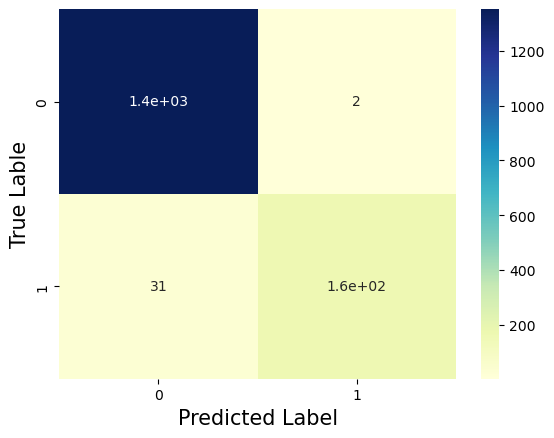

In [29]:
lr=LogisticRegression()
mymodel(lr)

## Support Vector Classifier

In [30]:
from sklearn.svm import SVC
svm=SVC()

Training Accuracy:- 0.9950248756218906
 Testing Accuracy:-  0.9716312056737588
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1355
        spam       0.99      0.79      0.88       196

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551



SVC()

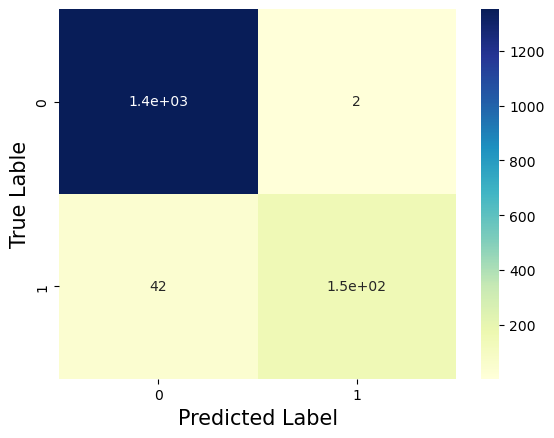

In [31]:
mymodel(svm)

## BernoulliNB

Training Accuracy:- 0.9715312327252625
 Testing Accuracy:-  0.9613152804642167
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98      1355
        spam       0.94      0.74      0.83       196

    accuracy                           0.96      1551
   macro avg       0.95      0.87      0.90      1551
weighted avg       0.96      0.96      0.96      1551



BernoulliNB()

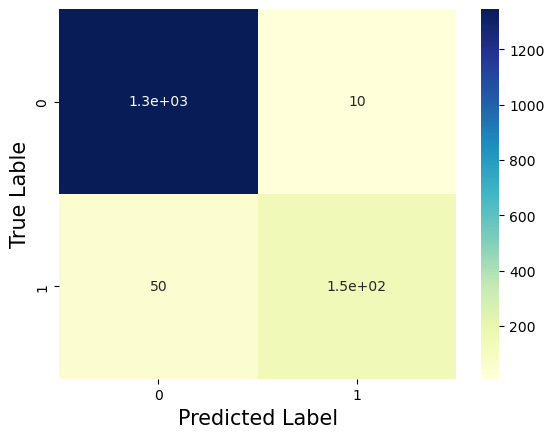

In [32]:
bnb=BernoulliNB()
mymodel(bnb)

## MultinomialNB

Training Accuracy:- 0.9881149806522941
 Testing Accuracy:-  0.9638942617666022
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1355
        spam       0.80      0.94      0.87       196

    accuracy                           0.96      1551
   macro avg       0.90      0.96      0.92      1551
weighted avg       0.97      0.96      0.97      1551



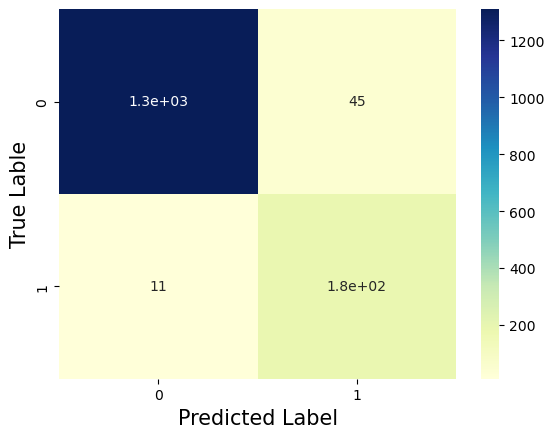

In [33]:
mb = mymodel(MultinomialNB())

#### Logistice Regression Performs best with accuracy = 98%, with best f1 score

### Forecast New Observation

In [34]:
def checksentiment(text):
    xnew = cv.transform([text]).toarray()
    ypred = lr.predict(xnew)
    return ypred[0]

In [35]:
mesg1 = "free...free..free...! buy 1 get 1 free offer valid till tom..."
mesg2 = "I call you later, don't have network. If urgnt, sms me."

In [36]:
checksentiment(mesg1)

'spam'

In [37]:
checksentiment(mesg2)

'ham'

## Thank You